Train MSE: 4026.627285019663
Test MSE: 27.96258567644983


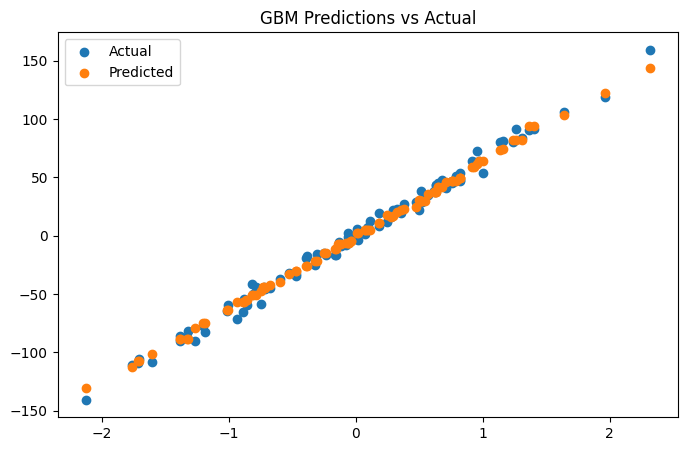

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class GradientBoostingMachine:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        # Initialize residual as the target
        residual = y
        self.models = []

        for i in range(self.n_estimators):
            # Fit a weak learner to the residual
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)
            self.models.append(tree)

            # Update residual
            predictions = tree.predict(X)
            residual -= self.learning_rate * predictions

    def predict(self, X):
        # Initialize prediction as zero
        prediction = np.zeros(X.shape[0])

        for tree in self.models:
            prediction += self.learning_rate * tree.predict(X)
        return prediction

# Generate synthetic data
X, y = make_regression(n_samples=500, n_features=1, noise=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit GBM model
gbm = GradientBoostingMachine(n_estimators=50, learning_rate=0.1, max_depth=3)
gbm.fit(X_train, y_train)

# Predictions
y_pred_train = gbm.predict(X_train)
y_pred_test = gbm.predict(X_test)

# Evaluation
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

# Plot predictions vs actual
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred_test, label="Predicted")
plt.legend()
plt.title("GBM Predictions vs Actual")
plt.show()
